# Deviations from Normality

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import stark

In [2]:
from stark.data import hedge_fund_index_returns
data = hedge_fund_index_returns()
data.head()

/Users/arturopolancolozano/Documents/GitHub/Investment-Management-with-Python-and-Machine-Learning/Introduction to Portfolio Construction and Analysis with Python/Week 1/stark/data.py:30: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hf_index_returns = pd.read_csv(


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [4]:
pd.concat(
    [
        data.mean(), 
        data.median(), 
        data.mean() > data.median()
    ], 
    axis="columns"
)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


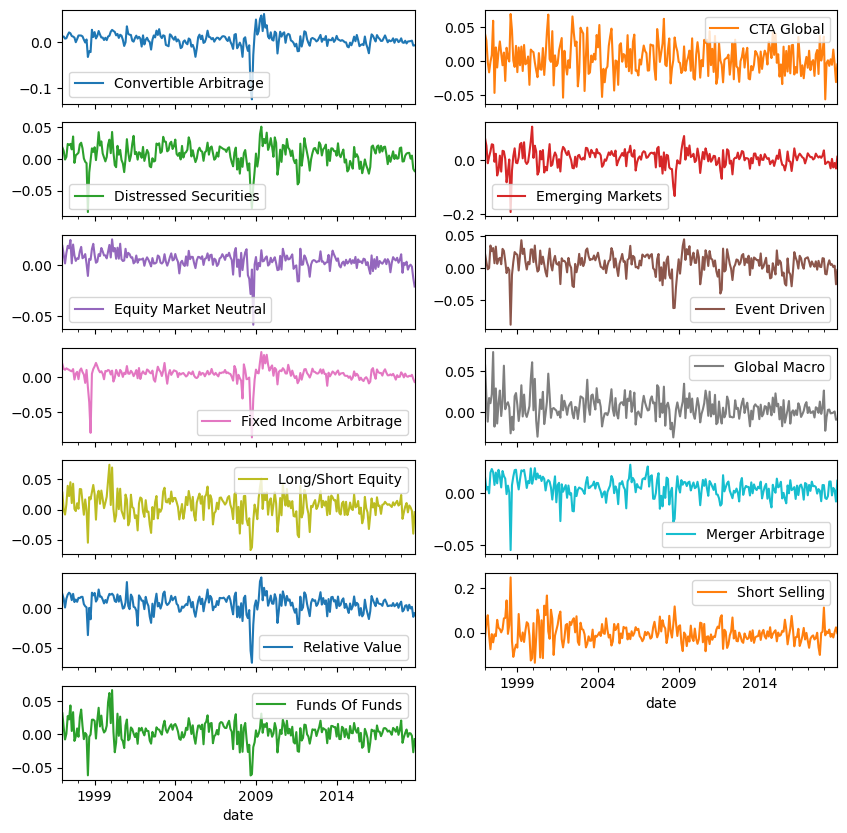

In [6]:
data.plot(
    subplots=True,
    layout = (7, 2), 
    figsize=(10, 10)
);

# Formula for Skewedness

$$ S(R) = \frac{E[ (R-E(R)) ^ 3]}{\sigma_R ^ 3} $$

In [8]:
from stark.metrics import skewness

skewness(data).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [12]:
import scipy.stats



In [15]:
sorted(scipy.stats.skew(data))

[-3.940320291190085,
 -2.6395922251089257,
 -2.1244353839421204,
 -1.815469748938015,
 -1.4091535635547938,
 -1.3200833333543776,
 -1.300842043791221,
 -1.1670674947992334,
 -0.3902267741883951,
 -0.3617830836837326,
 0.17369864499039034,
 0.7679748443026667,
 0.9829218839470764]

In [26]:
import numpy as np

normal_returns = np.random.normal(
    loc=0, 
    scale=0.15, 
    size=(10_000, 1)
)

skewness(pd.Series(normal_returns.squeeze()))

-0.01594537697090258

In [27]:
scipy.stats.skew(normal_returns)

array([-0.01594538])

## Kurtosis
$$ K(R) = \frac{E[ (R-E(R)) ^ 4]}{\sigma_R ^ 4} $$

In [28]:
from stark.metrics import kurtosis

kurtosis(pd.Series(normal_returns.squeeze()))

2.9458100876146154

In [30]:
scipy.stats.kurtosis(normal_returns) + 3

array([2.94581009])

# Check Normal Distribution with Jarque-Bera test

In [31]:
scipy.stats.jarque_bera(normal_returns)

Jarque_beraResult(statistic=1.6473194963805757, pvalue=0.4388227314778391)

In [32]:
scipy.stats.jarque_bera(data)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

In [33]:
from stark.metrics import is_normal

is_normal(pd.Series(normal_returns.squeeze()))

True

In [34]:
data.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [35]:
from stark.data import fama_french_market_equity
ffme = fama_french_market_equity()
skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [37]:
kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [38]:
ffme.aggregate(is_normal)

SmallCap    False
LargeCap    False
dtype: bool